In [211]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70em !important; }</style>"))
# displaydisplay(HTML("<style>.container { width:79em !important; }</style>"))

In [15]:
import pandas as pd
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 5)

<a title="von Jeanot derivative work: Ju gatsu mikka (^o^) appelez moi Ju (^o^) (Uncle_Sam_(pointing_finger).jpg) [Public domain], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File%3AUncle_Sam_(pointing_finger).png"><img width="256" alt="Uncle Sam (pointing finger)" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Uncle_Sam_%28pointing_finger%29.png/256px-Uncle_Sam_%28pointing_finger%29.png"/></a>
# Fancy Plotting Skills or: How to plot an Elephant


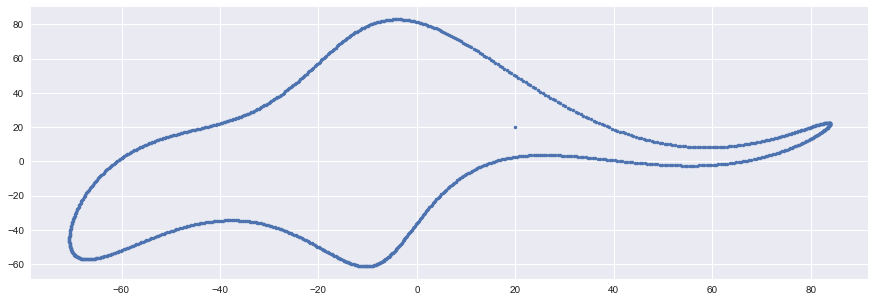

In [304]:
"""
Author: Piotr A. Zolnierczuk (zolnierczukp at ornl dot gov)
 
Based on a paper by:
Drawing an elephant with four complex parameters
Jurgen Mayer, Khaled Khairy, and Jonathon Howard,
Am. J. Phys. 78, 648 (2010), DOI:10.1119/1.3254017
"""
import numpy as np
import pylab
 
# elephant parameters
p1, p2, p3, p4 = (50 - 30j, 18 +  8j, 12 - 10j, -14 - 60j )
p5 = 40 + 20j # eyepiece
 
def fourier(t, C):
    f = np.zeros(t.shape)
    A, B = C.real, C.imag
    for k in range(len(C)):
        f = f + A[k]*np.cos(k*t) + B[k]*np.sin(k*t)
    return f
 
def elephant(t, p1, p2, p3, p4, p5):
    npar = 6
    Cx = np.zeros((npar,), dtype='complex')
    Cy = np.zeros((npar,), dtype='complex')

    Cx[1] = p1.real*1j
    Cx[2] = p2.real*1j
    Cx[3] = p3.real
    Cx[5] = p4.real

    Cy[1] = p4.imag + p1.imag*1j
    Cy[2] = p2.imag*1j
    Cy[3] = p3.imag*1j

    x = np.append(fourier(t,Cx), [-p5.imag])
    y = np.append(fourier(t,Cy), [p5.imag])
    return x,y
 
x, y = elephant(np.linspace(0,2*np.pi,1000), p1, p2, p3, p4, p5)
pylab.plot(y,-x,'.')
pylab.show()

Read this and you'll know everything about matplotlib.

In [309]:
for _ in range(10):
    display(HTML("<br />"))

### What will __YOU__ learn?
- You'll learn to do basic plots:
  * Barplot / Histogram
  * Pie Chart
  * Scatter Plot (only plot the points)
  * Boxplot (that statistical thang)
- you'll learn fancy, advanced arranging of plots
- You'll learn advanced formatting:
  * fancy colors
  * fancy tricks
  * fancy sizes
  * Axis stuff
 

Okay, let's go:

<br />
<br /><br /><br /><br /><br /><br /><br />



<img src='https://media.giphy.com/media/k0MotNKu7p0By/giphy.gif' />

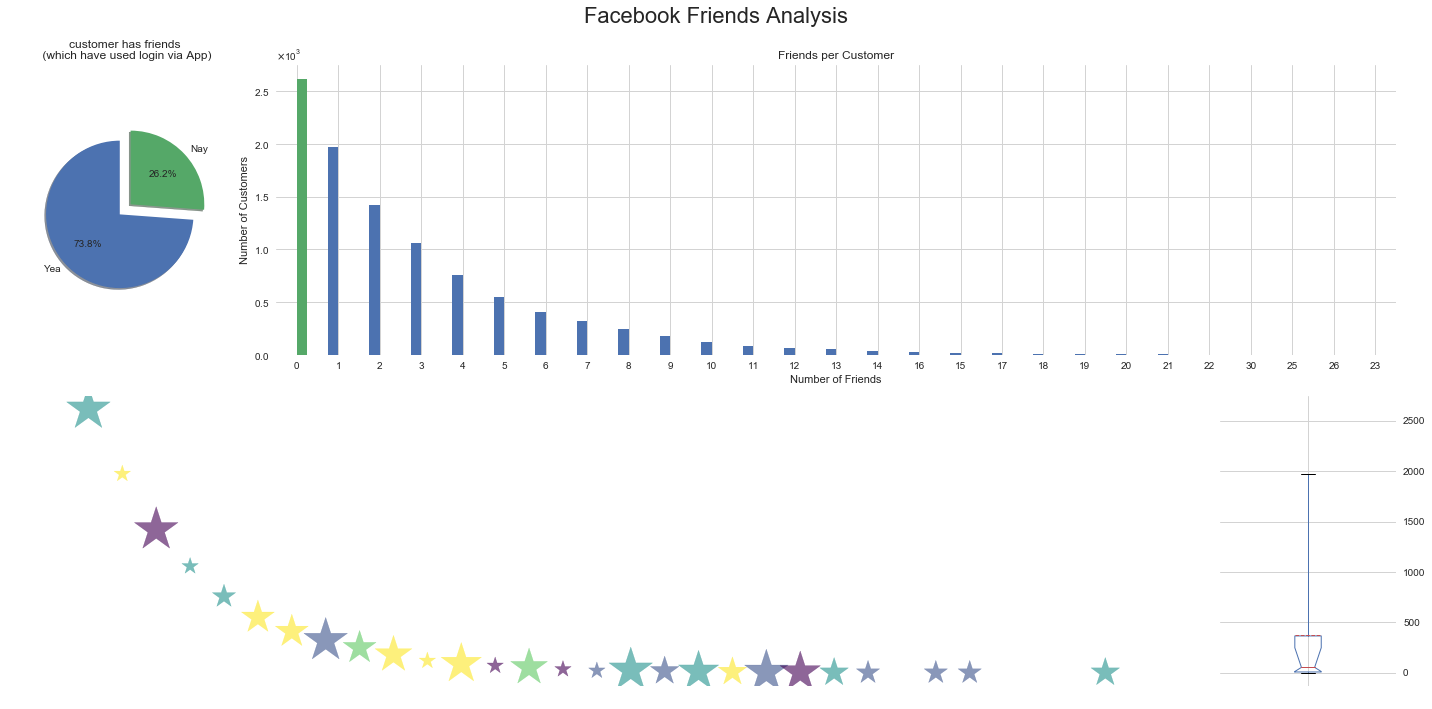

In [322]:
display(HTML("<a id='fancyplot'>"))
hist_data = pd.DataFrame(np.random.exponential(3.3, size=10000), columns=['data']).astype(int)
hist_data = hist_data['data'].value_counts()
pie_data = pd.Series(np.repeat(hist_data.index == 0, hist_data.values)).value_counts()
box_data = hist_data.copy()
digit_data = box_data.apply(lambda x: len(str(x)))
hist_data = pd.DataFrame(hist_data)
hist_data.loc[0, 'data2'] = hist_data.loc[0, 'data']
hist_data.loc[0, 'data'] = np.nan

from matplotlib.ticker import ScalarFormatter
scalar_formatter = ScalarFormatter(useMathText=True)
scalar_formatter.set_powerlimits((3,3))

gs = plt.GridSpec(2, 3, width_ratios=(1, 5, 1))
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(gs[0, 0])
ax2 = f.add_subplot(gs[0, 1:])
ax3 = f.add_subplot(gs[1,:2])
ax4 = f.add_subplot(gs[1, 2])

pie_data.plot.pie(ax=ax1,
                  labels=('Yea', 'Nay'), explode=(0,0.2), shadow=True,autopct='%1.1f%%', startangle=90)
hist_data.plot.bar(ax=ax2,
                   rot=0, legend=False)
ax3.scatter(box_data.index, box_data.values, marker='*', cmap='viridis',
            s=300*box_data.apply(lambda x: (x % 7) + 1),  c=box_data.apply(lambda x: (x % 5) + 1), alpha=0.6)
box_data.plot.box(whis=5.5, ax=ax4, showmeans=True, meanline=True, notch=True, sym='*', bootstrap=10000)

# Pie Data
ax1.set_title('customer has friends\n (which have used login via App)')
ax1.set_ylabel('')
# Hist
ax2.set_title('Friends per Customer')
ax2.set_xlabel("Number of Friends")
ax2.set_ylabel("Number of Customers")
ax2.yaxis.set_major_formatter(scalar_formatter)  #fancy formatting
# Boxplot
ax4.xaxis.set_ticklabels('')
f.suptitle("Facebook Friends Analysis", fontsize=22)


# BG white
ax2.set_facecolor('white')
ax3.set_facecolor('white')
ax4.set_facecolor('white')

# Special Axis Stuff
ax1.axis("equal")
ax3.axis("off")
ax4.yaxis.tick_right() # axis to the right side

ax2.grid(True, which='major', color='lightgrey')
ax4.grid(True, which='major', color='lightgrey')


gs.tight_layout(f, rect=(0,0,1,0.95))
display(HTML("</a>"))

## Basics - The Data and the Plot Types

In [312]:
hist_data = pd.DataFrame(np.random.exponential(4, size=10000), columns=['data']).astype(int)
hist_data = hist_data['data'].value_counts()
hist_data.head()

0    2212
1    1752
2    1314
3    1033
4     790
Name: data, dtype: int64

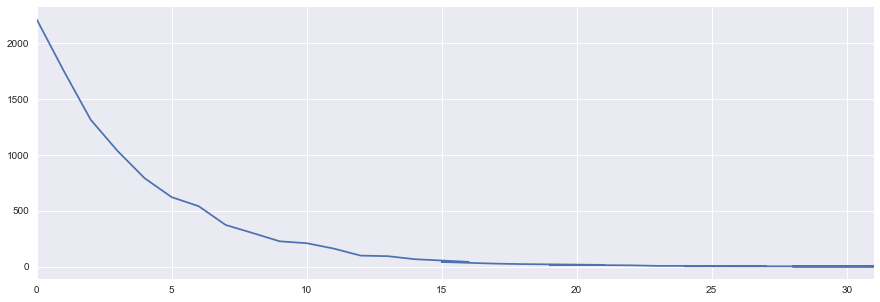

In [313]:
hist_data.plot()

In [314]:
pie_data = pd.Series(np.repeat(hist_data.index == 0, hist_data.values)).value_counts()
# Hacky Trick, just to get True X times and False Y times, with X number of customers without friends and Y number of customers with friends
pie_data

False    7788
True     2212
dtype: int64

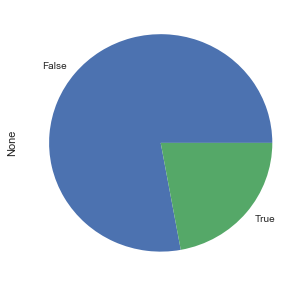

In [315]:
pie_data.plot.pie(figsize=(5,5))

In [316]:
box_data = hist_data.copy()
hist_data = pd.DataFrame(hist_data)
hist_data.loc[0, 'data2'] = hist_data.loc[0, 'data']
hist_data.loc[0, 'data'] = np.nan
hist_data.head()

,data,data2
0,NaN,2212.0
1,1752.0,NaN
2,1314.0,NaN
3,1033.0,NaN
4,790.0,NaN


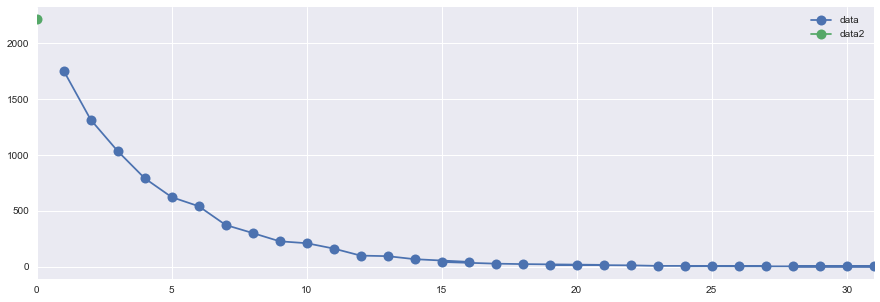

In [317]:
hist_data.plot(style='.-', markersize=20)

Not so special, isn't it?

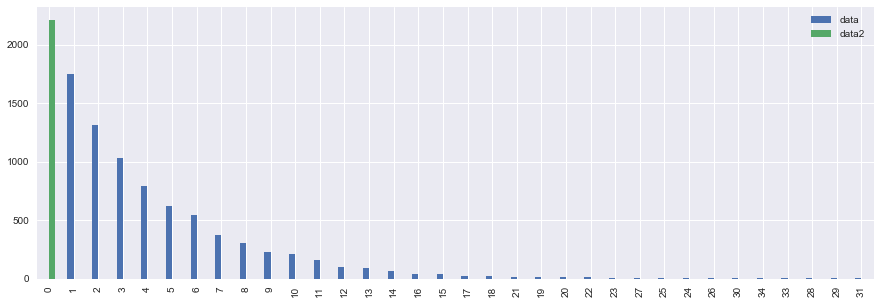

In [318]:
hist_data.plot.bar()

Ahh, there we go.

Finally we have scatter and Boxplots:

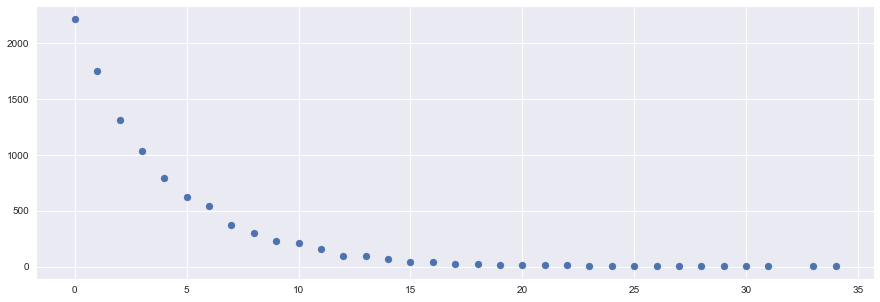

In [320]:
plt.scatter(box_data.index, box_data.values)

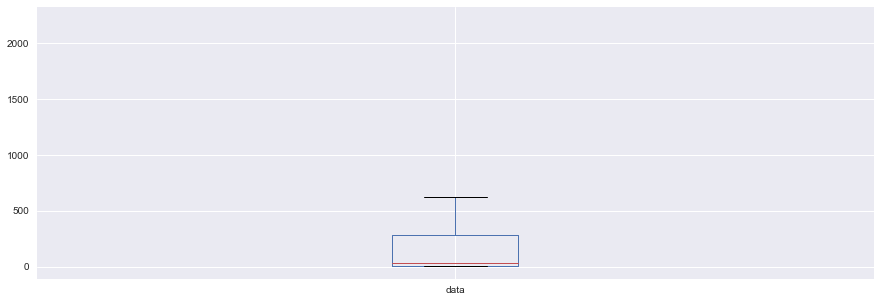

In [319]:
box_data.plot.box()

## Advanced - Formatting

## Masterclass - Arranging them

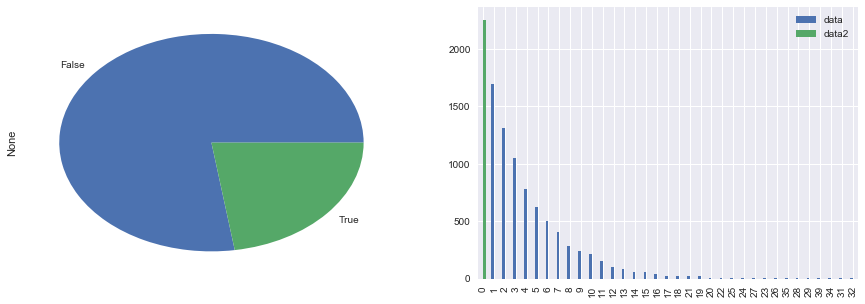

In [277]:
ax0 = plt.subplot(121)
ax1 = plt.subplot(122)
# Wow, i don't want to do this, when creating more and more subplots
pie_data.plot.pie(ax=ax0)
hist_data.plot.bar(ax=ax1)

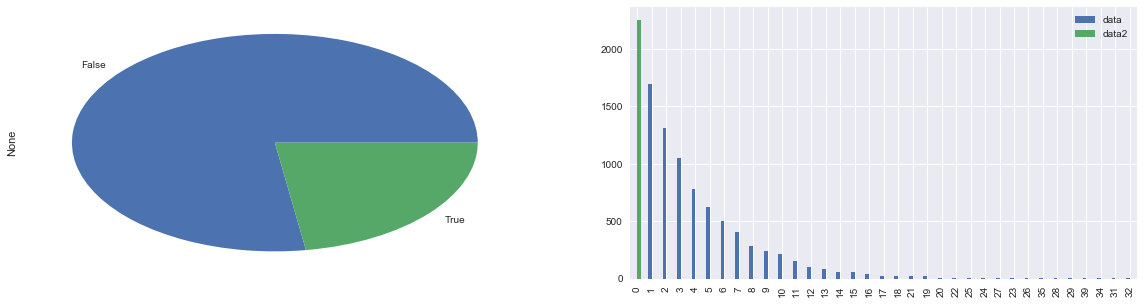

In [278]:
fig = plt.figure(figsize=(20,5))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
# Same here, not economical
pie_data.plot.pie(ax=ax0)
hist_data.plot.bar(ax=ax1)

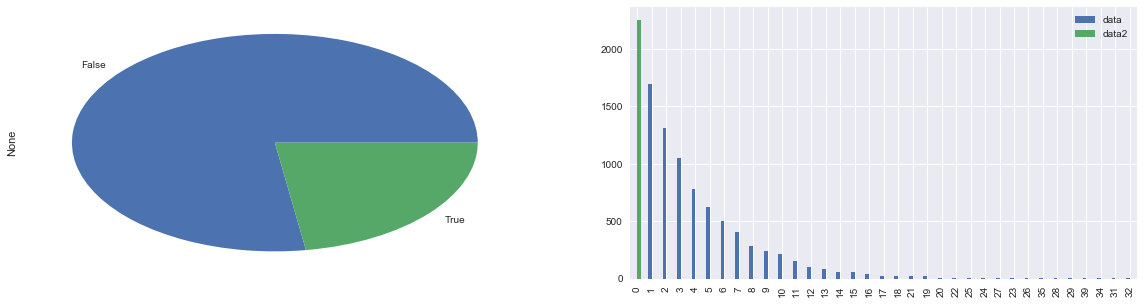

In [279]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
# much better! yea!
pie_data.plot.pie(ax=ax[0])
hist_data.plot.bar(ax=ax[1])

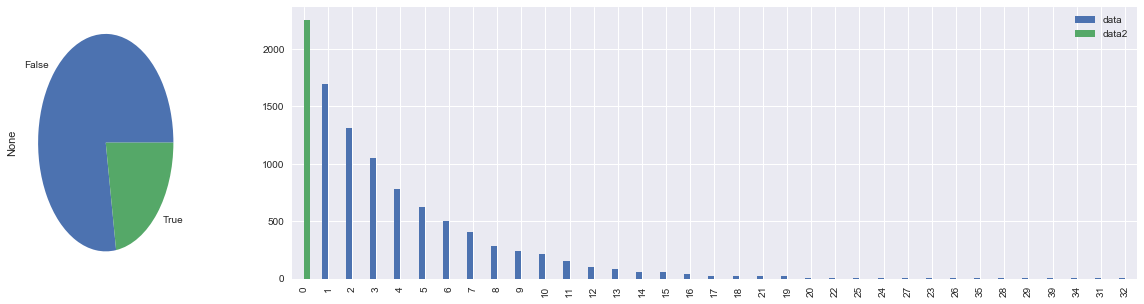

In [280]:
fig, ax = plt.subplots(1, 2, figsize=(20,5), gridspec_kw = {'width_ratios':[1,5]})
# much better! yea!
pie_data.plot.pie(ax=ax[0])
hist_data.plot.bar(ax=ax[1])

So, this is one row... but we saw multiple rows and columns, let's try this:

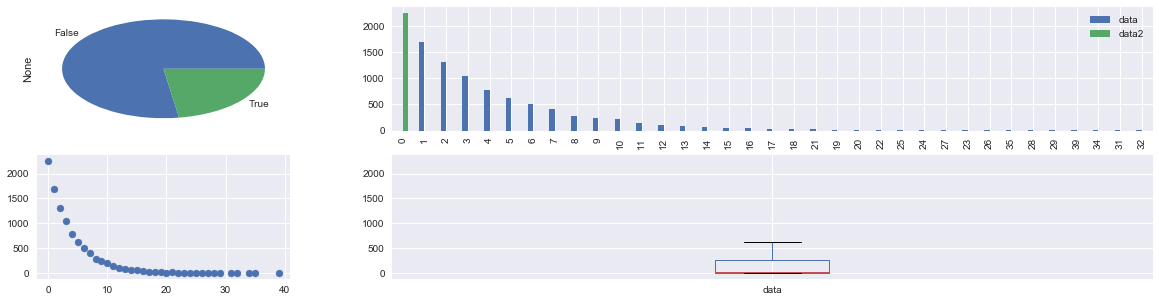

In [281]:
fig, ax = plt.subplots(2, 2, figsize=(20,5), gridspec_kw = {'width_ratios':[1,3]})
# much better! yea!
pie_data.plot.pie(ax=ax[0, 0])
hist_data.plot.bar(ax=ax[0, 1])
# important: this works also fine, instead of using the pandas routine which is kind of a wrapper, we give the object to the matplotlib routine directly
ax[1,0].scatter(box_data.index, box_data.values)
box_data.plot.box(ax=ax[1,1])

##### Fine, this is all of our data now... but how to make it look like [the first plot](#fancyplot)?

<img src='https://media3.giphy.com/media/l41YtZOb9EUABnuqA/giphy.gif' />

### Solution for ALL of our Problems: Gridspec
<img src='https://matplotlib.org/_images/demo_gridspec01.png' />

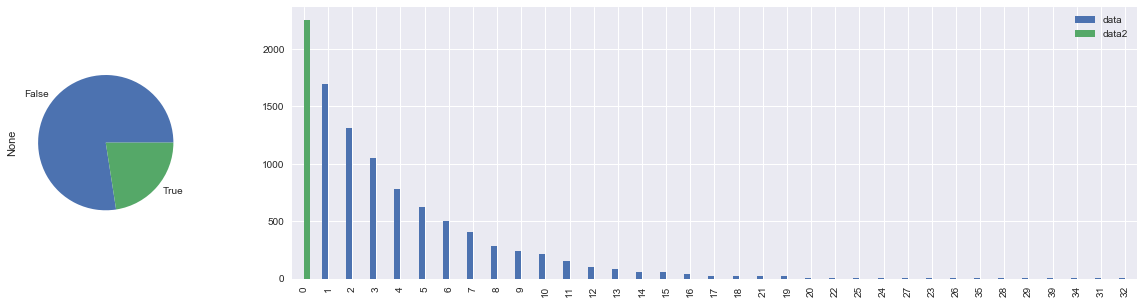

In [282]:
gs = plt.GridSpec(1, 2, width_ratios=(1,5))
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(gs[0])
ax2 = f.add_subplot(gs[1])
ax1.axis("equal")
pie_data.plot.pie(ax=ax1)
hist_data.plot.bar(ax=ax2)


Cool, very easy... but not that's not enough:


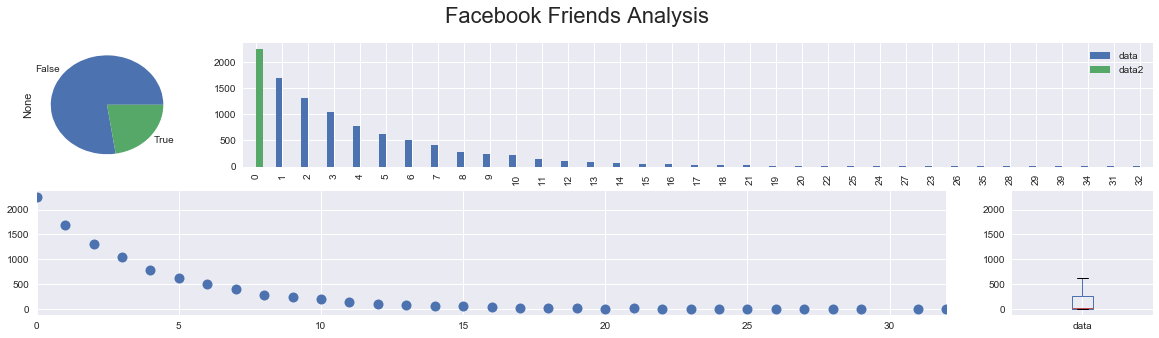

In [283]:
gs = plt.GridSpec(2, 3, width_ratios=(1,5, 1))
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(gs[0, 0])
ax2 = f.add_subplot(gs[0, 1:])
ax3 = f.add_subplot(gs[1, :2])
ax4 = f.add_subplot(gs[1, 2])

pie_data.plot.pie(ax=ax1)
hist_data.plot.bar(ax=ax2)
box_data.plot(style='.', markersize=20, ax=ax3)
box_data.plot.box(ax=ax4)
f.suptitle("Facebook Friends Analysis", fontsize=22)

Perfect, that's what we wanted.
<img src='https://media4.giphy.com/media/l4FGzZVduahwaz3K8/giphy.gif' />

##### Now, let's talk about the
#### individual formatting:

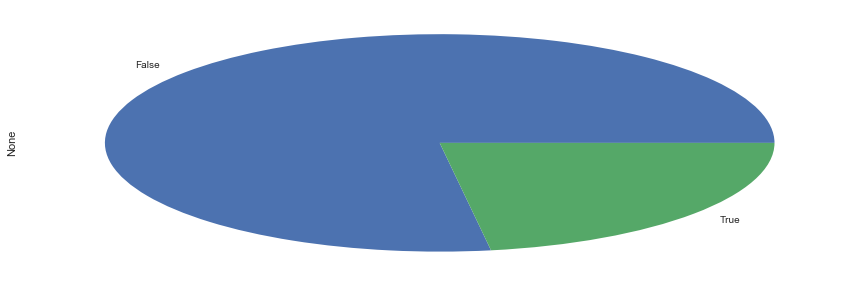

In [284]:
pie_data.plot.pie()

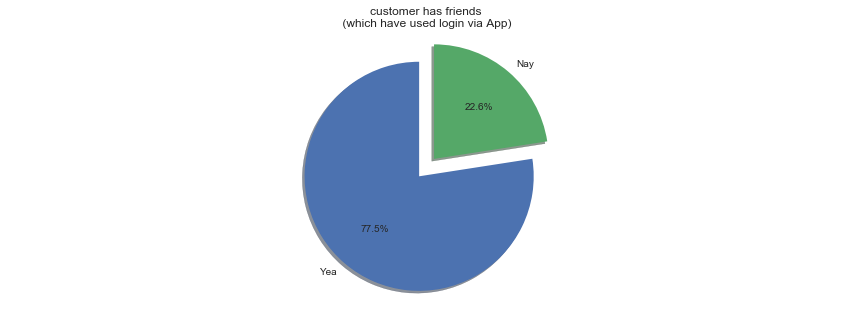

In [285]:
pie_data.plot.pie(labels=('Yea', 'Nay'), explode=(0,0.2), shadow=True,autopct='%1.1f%%', startangle=90)
ax1 = plt.gca()
ax1.axis("equal")
ax1.set_title('customer has friends\n (which have used login via App)')
ax1.set_ylabel('')

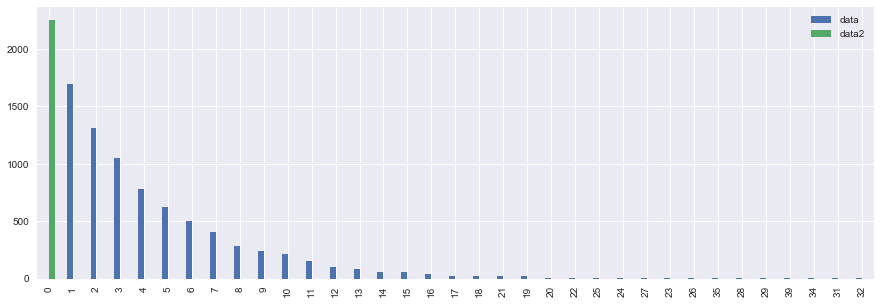

In [286]:
hist_data.plot.bar()

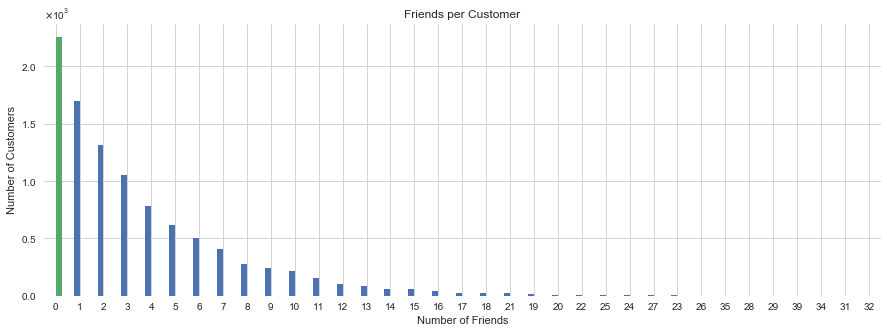

In [287]:
from matplotlib.ticker import ScalarFormatter
scalar_formatter = ScalarFormatter(useMathText=True)
scalar_formatter.set_powerlimits((3,3))

hist_data.plot.bar(rot=0, legend=False)
ax2 = plt.gca()
# Hist
ax2.set_title('Friends per Customer')
ax2.set_xlabel("Number of Friends")
ax2.set_ylabel("Number of Customers")
# Digit Data

ax2.set_facecolor('white')  # whitesmoke
ax2.grid(True, which='major', color='lightgrey')
ax2.yaxis.set_major_formatter(scalar_formatter)  #fancy formatting

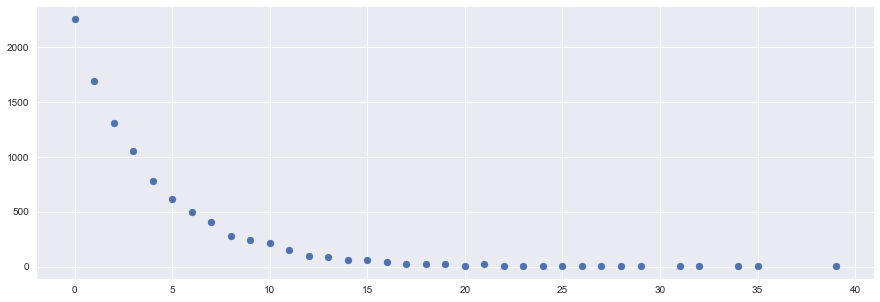

In [288]:
plt.scatter(box_data.index, box_data.values)

(-1.9699644642546912,
 40.974002225747377,
 -111.75232463335942,
 2367.7634346644886)

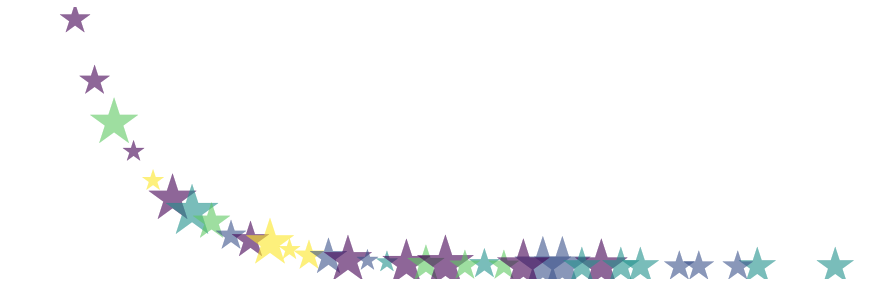

In [289]:
plt.scatter(box_data.index, box_data.values, marker='*', cmap='viridis',
            s=500*box_data.apply(lambda x: (x % 7) + 1),
            c=box_data.apply(lambda x: (x % 5) + 1), alpha=0.6)
ax3 = plt.gca()
ax3.set_facecolor('white')  # whitesmoke
ax3.axis("off")

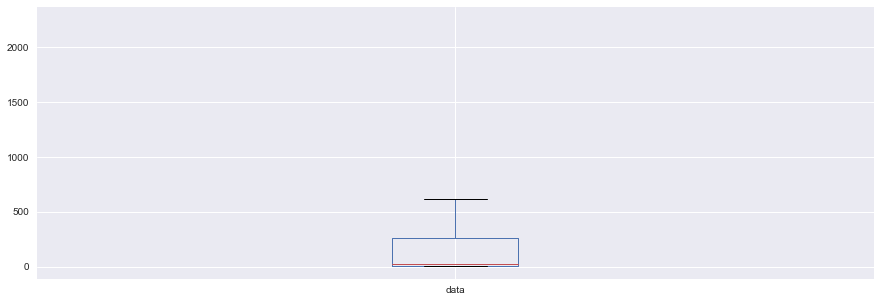

In [290]:
box_data.plot.box()

[]

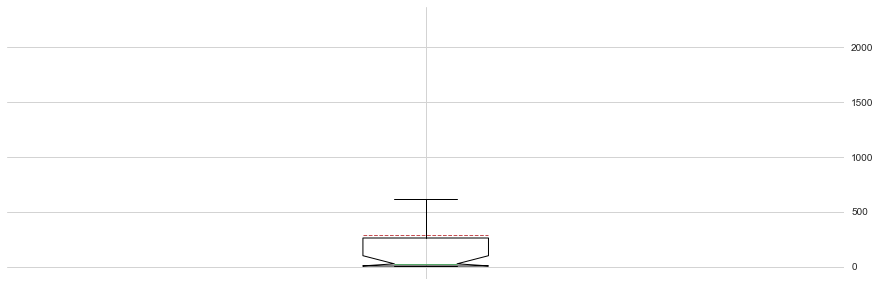

In [302]:
plt.boxplot(box_data.values, whis=1.5, showmeans=True, meanline=True, notch=True, sym='*', bootstrap=10000)
ax4 = plt.gca()
ax4.set_facecolor('white')  # whitesmoke
ax4.yaxis.tick_right()
ax4.grid(color='lightgrey')
ax4.xaxis.set_ticklabels('')

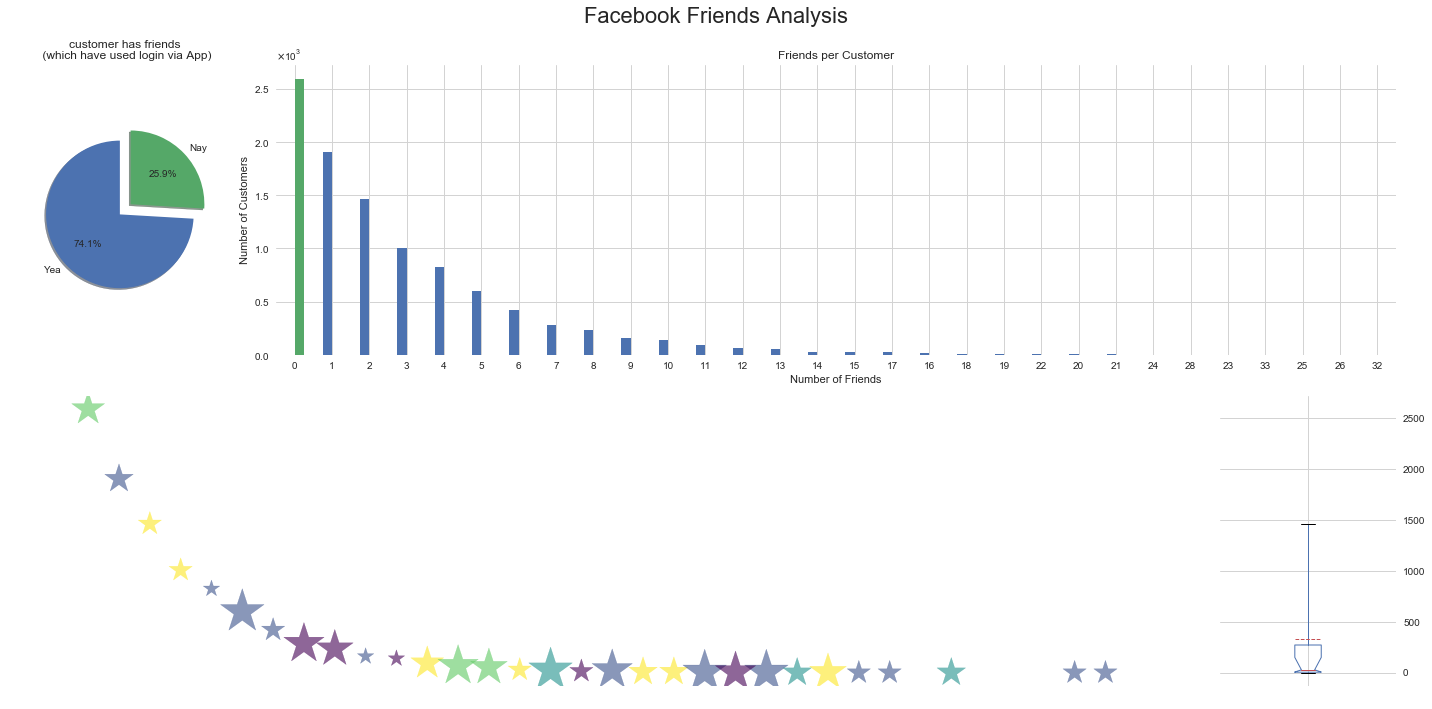

In [323]:
hist_data = pd.DataFrame(np.random.exponential(3.3, size=10000), columns=['data']).astype(int)
hist_data = hist_data['data'].value_counts()
pie_data = pd.Series(np.repeat(hist_data.index == 0, hist_data.values)).value_counts()
box_data = hist_data.copy()
digit_data = box_data.apply(lambda x: len(str(x)))
hist_data = pd.DataFrame(hist_data)
hist_data.loc[0, 'data2'] = hist_data.loc[0, 'data']
hist_data.loc[0, 'data'] = np.nan

from matplotlib.ticker import ScalarFormatter
scalar_formatter = ScalarFormatter(useMathText=True)
scalar_formatter.set_powerlimits((3,3))

gs = plt.GridSpec(2, 3, width_ratios=(1, 5, 1))
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(gs[0, 0])
ax2 = f.add_subplot(gs[0, 1:])
ax3 = f.add_subplot(gs[1,:2])
ax4 = f.add_subplot(gs[1, 2])

pie_data.plot.pie(ax=ax1,
                  labels=('Yea', 'Nay'), explode=(0,0.2), shadow=True,autopct='%1.1f%%', startangle=90)
hist_data.plot.bar(ax=ax2,
                   rot=0, legend=False)
ax3.scatter(box_data.index, box_data.values, marker='*', cmap='viridis',
            s=300*box_data.apply(lambda x: (x % 7) + 1),  c=box_data.apply(lambda x: (x % 5) + 1), alpha=0.6)
box_data.plot.box(whis=5.5, ax=ax4, showmeans=True, meanline=True, notch=True, sym='*', bootstrap=10000)

# Pie Data
ax1.set_title('customer has friends\n (which have used login via App)')
ax1.set_ylabel('')
# Hist
ax2.set_title('Friends per Customer')
ax2.set_xlabel("Number of Friends")
ax2.set_ylabel("Number of Customers")
ax2.yaxis.set_major_formatter(scalar_formatter)  #fancy formatting
# Boxplot
ax4.xaxis.set_ticklabels('')
f.suptitle("Facebook Friends Analysis", fontsize=22)


# BG white
ax2.set_facecolor('white')
ax3.set_facecolor('white')
ax4.set_facecolor('white')

# Special Axis Stuff
ax1.axis("equal")
ax3.axis("off")
ax4.yaxis.tick_right() # axis to the right side

ax2.grid(True, which='major', color='lightgrey')
ax4.grid(True, which='major', color='lightgrey')

gs.tight_layout(f, rect=(0,0,1,0.95))

<img src='https://media1.giphy.com/media/l3q2LH45XElELRzRm/giphy.gif' />